# Oceanographic Analysis - CalCOFI Capstone

# 2. Data Wrangling
- Collect, organize, define, and clean relevant datasets.

## Data Collection

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing datetime
from datetime import datetime as dt
from datetime import timedelta

# File system manangement
import os,sys

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#Interactive Shell
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

#Pandas profiling
from pandas_profiling import ProfileReport

import missingno as msno
import re 

%matplotlib inline

## Workspace

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/asaadkhattab/Documents/DSProjects/OceanographicAnalysisCalCOFI


In [3]:
os.listdir(cwd)
#os.listdir( os.getcwd() )

['.DS_Store',
 'LICENSE',
 '2_DataWrangling.ipynb',
 'models',
 'README.md',
 '1_ProblemIdentification.ipynb',
 '.gitignore',
 'figures',
 '.ipynb_checkpoints',
 '.git',
 '4_Preprocessing_Modelling.ipynb',
 'data']

## Load the Data from CSV File

In [4]:
# Import CSV file and read the dataset
path = '../data/calcofi/bottle.csv'
bottle = pd.read_csv(path, encoding='latin-1') #parse_dates=True

In [5]:
# Show all columns
pd.set_option('max_columns', None)

#### First 5 rows 

In [6]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_Sal,R_DYNHT,R_Nuts,R_Oxy_µmol/Kg,DIC1,DIC2,TA1,TA2,pH1,pH2,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Last 3 rows

In [7]:
bottle.tail(3)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_Sal,R_DYNHT,R_Nuts,R_Oxy_µmol/Kg,DIC1,DIC2,TA1,TA2,pH1,pH2,DIC Quality Comment
887015,35272,887016,093.4 026.4,20-1911OC-MX-308-2233-09340264-0006A-3,6,17.278,33.6271,6.058,24.39638,110.47,264.11,2.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.664,NaN,0.587,NaN,0.21,NaN,2.40,NaN,0.000,8.0,0.0,8.0,0.24,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,6.0,17.28,352.5,0.022,0.24,264.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887016,35272,887017,093.4 026.4,20-1911OC-MX-308-2233-09340264-0010A-7,10,17.177,33.6199,5.985,24.41515,108.91,260.92,NaN,7,2.0,NaN,3.0,6.0,NaN,6.0,6.0,6.0,3.178,NaN,0.708,NaN,0.25,NaN,2.70,NaN,NaN,9.0,0.0,8.0,0.61,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,17.18,350.8,0.032,0.61,260.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887017,35272,887018,093.4 026.4,20-1911OC-MX-308-2233-09340264-0011A-3,11,17.145,33.6187,5.921,24.42188,107.69,258.13,1.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.306,NaN,0.738,NaN,0.26,NaN,2.77,NaN,0.028,NaN,0.0,8.0,0.70,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,11.0,17.14,350.2,0.039,0.70,258.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Functions

In [8]:
# Convert Celcius to Fahr
def cel_to_fahr(x):
    x = x * 1.8 + 32
    return float(x)

In [9]:
# Dimensions of the dataset. #(samples,features)
print("There are", bottle.shape[0], "Rows(Observations).")
print("There are", bottle.shape[1], "Columns(Features).")
bottle.shape

There are 887018 Rows(Observations).
There are 62 Columns(Features).


(887018, 62)

___

## Data Organization

#### Create SubFolders

In [10]:
newfolder = "../OceanographicAnalysisCalCOFI/data"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory ../OceanographicAnalysisCalCOFI/data failed


In [11]:
newfolder = "../OceanographicAnalysisCalCOFI/figures"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory ../OceanographicAnalysisCalCOFI/figures failed


In [12]:
newfolder = "../OceanographicAnalysisCalCOFI/models"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory ../OceanographicAnalysisCalCOFI/models failed


---

## Data Definition

### Explore the Data

In [13]:
# Get DataFrame Information
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887018 entries, 0 to 887017
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              887018 non-null  int64  
 1   Btl_Cnt              887018 non-null  int64  
 2   Sta_ID               887018 non-null  object 
 3   Depth_ID             887018 non-null  object 
 4   Depthm               887018 non-null  int64  
 5   T_degC               876053 non-null  float64
 6   Salnty               839663 non-null  float64
 7   O2ml_L               717589 non-null  float64
 8   STheta               834327 non-null  float64
 9   O2Sat                682668 non-null  float64
 10  Oxy_µmol/Kg          682657 non-null  float64
 11  BtlNum               133892 non-null  float64
 12  RecInd               887018 non-null  int64  
 13  T_prec               876055 non-null  float64
 14  T_qual               23129 non-null   float64
 15  S_prec           

There are no missing values. AppointmentDay and ScheduledDay should be converted to datetime. There are 3 objects (Gender, Neighborhood, and No-show)

#### Variable Types

In [14]:
bottle.dtypes.value_counts()

float64    54
object      4
int64       4
dtype: int64

In [15]:
print(bottle.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_Sal', 'R_DYNHT', 'R_Nuts',
       'R_Oxy_µmol/Kg', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH1', 'pH2',
       'DIC Quality Comment'],
      dtype='object')


# Handling Missing Values

In [16]:
#Counts and percentage of null values 
dictionary = {
    "NullCount":bottle.isnull().sum().sort_values(ascending=False),
    "NullPercent":bottle.isnull().sum().sort_values(ascending=False)/len(bottle)*100
}

na_df = pd.DataFrame(dictionary)
na_df.columns = ['NullCount','NullPercent']
na_df[(na_df['NullCount'] > 0)].reset_index()


,index,NullCount,NullPercent
0,pH2,887008,99.998873
1,DIC Quality Comment,886963,99.993799
2,pH1,886934,99.990530
3,DIC2,886794,99.974747
4,TA2,886784,99.973619
5,DIC1,885019,99.774638
6,TA1,884934,99.765056
7,C14A2p,874276,98.563502
8,C14A1p,874258,98.561472
9,C14As2,871596,98.261366


On line 40 in the previous DataFrame we see that O2ml_L is missing 19.10% of data.  So we will delete all rows that has more than 19% of missing data. 

In [17]:
pct_null = bottle.isnull().sum() / len(bottle)
missing_features = pct_null[pct_null > 0.19].index
bottle.drop(missing_features, axis=1, inplace=True)
df = bottle

<AxesSubplot:>

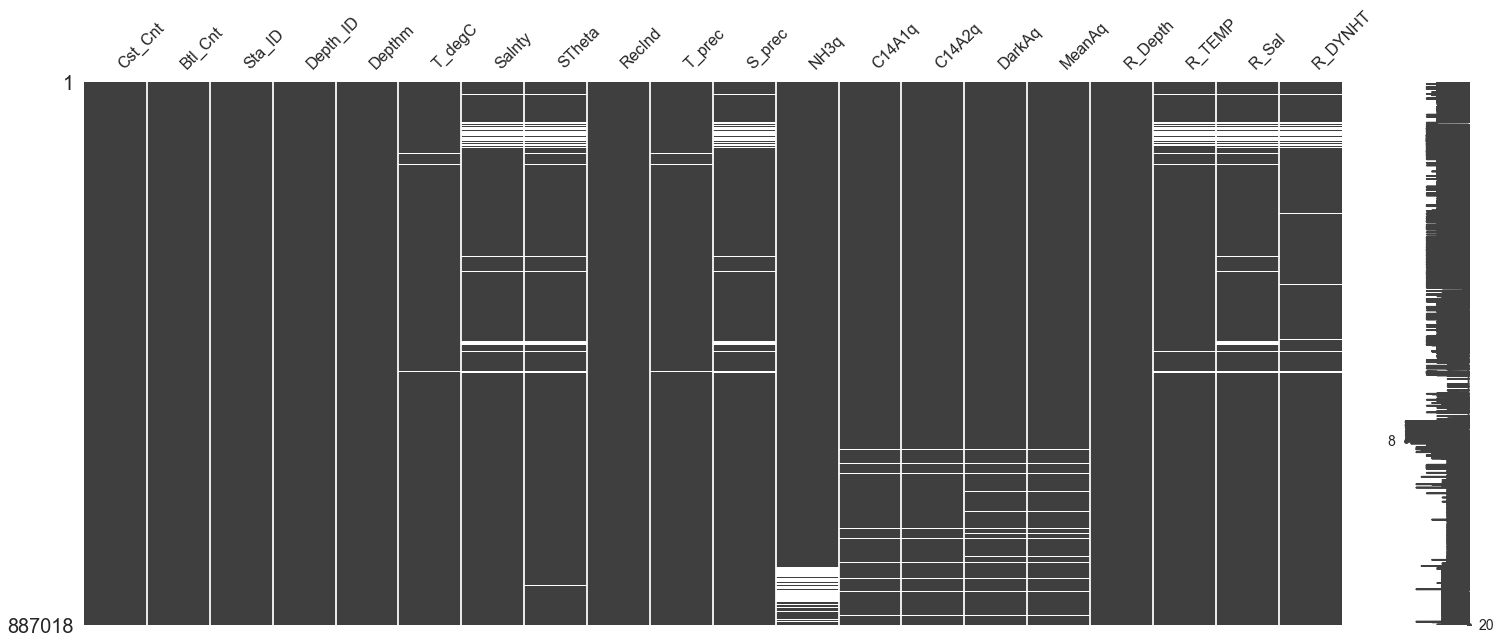

In [18]:
# Visualize Missingness
msno.matrix(df)
plt.show()

In [19]:
print ( df.nunique() / df.shape[0] * 100 )

Cst_Cnt       3.976469
Btl_Cnt     100.000000
Sta_ID        0.296950
Depth_ID     99.997520
Depthm        0.362901
T_degC        1.718680
Salnty        1.766255
STheta        6.213741
RecInd        0.000564
T_prec        0.000451
S_prec        0.000225
NH3q          0.000225
C14A1q        0.000225
C14A2q        0.000225
DarkAq        0.000225
MeanAq        0.000225
R_Depth       0.375190
R_TEMP        0.322090
R_Sal         0.592547
R_DYNHT       0.208451
dtype: float64


In [20]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_Sal,R_DYNHT
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,233.0,0.00
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,232.5,0.01
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,232.8,0.02
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,234.1,0.04
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,234.0,0.04


### Rename Columns

In [21]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_Sal', 'R_DYNHT'],
      dtype='object')

In [22]:
df = df.rename(columns = { 
    "Cst_Cnt": "CastCount",
    "Btl_Cnt": "BottleCount",
    "Depthm": "DepthMeters",
    "T_degC": "TempDegC",
    "Salnty": "Salinity",    
    "STheta": "PDensity"
    
})

### Set BottleCount to be Index

In [23]:
df = df.set_index('BottleCount')

### Extract Year and Month from Depth_ID 

In [27]:
# Extract Year
search = []    

for values in df['Depth_ID']:
    search.append(re.search(r'\d{2}-\d{2}', values).group())
    
df['Year'] = search
df['Year'] = df['Year'].replace(to_replace='-',value='', regex = True) 

df['Year'] = pd.to_datetime(df['Year']).values.astype('datetime64[Y]')
df['Year'] =  pd.DatetimeIndex(df['Year']).year

In [28]:
df.head()

,CastCount,Sta_ID,Depth_ID,DepthMeters,TempDegC,Salinity,PDensity,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_Sal,R_DYNHT,Year
BottleCount,,,,,,,,,,,,,,,,,,,,
1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,233.0,0.00,1949
2,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,232.5,0.01,1949
3,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,232.8,0.02,1949
4,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,234.1,0.04,1949
5,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,234.0,0.04,1949


In [30]:
# Extract Month 
search = []    

for values in df['Depth_ID']:
    search.append(re.search(r'-\d+', values).group())
    
df['Month'] = search
df['Month'] = df['Month'].str[-2:]

df['Month'] = df['Month'].astype('int64')

### Convert from Celsius to Fahrenheit

In [34]:
df['TempDegF'] = df['TempDegC'].apply(cel_to_fahr)
df = df.drop("TempDegC", axis = 1)

In [35]:
column_names = ["Salinity","TempDegF"]

saltemp = df.reindex(columns=column_names)

In [36]:
saltemp.head()

,Salinity,TempDegF
BottleCount,,
1,33.440,50.900
2,33.440,50.828
3,33.437,50.828
4,33.420,50.810
5,33.421,50.810


In [37]:
print('Salinity:', df.Salinity.unique() ) 
print('TempDegF:', df.TempDegF.unique() ) 

Salinity: [33.44   33.437  33.42   ... 34.0373 33.8616 33.7855]
TempDegF: [50.9    50.828  50.81   ... 68.4482 68.4536 63.1004]


## Dataset Statistics

In [38]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CastCount,887018,NaN,NaN,NaN,17581,10483,1,8462,17463,27190,35272
Sta_ID,887018,2634,090.0 070.0,10417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depth_ID,887018,886996,20-1911OC-MX-313-1236-09000530-0030A-3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DepthMeters,887018,NaN,NaN,NaN,225.038,313.2,0,45,125,300,5351
Salinity,839663,NaN,NaN,NaN,33.8378,0.459417,28.3652,33.487,33.86,34.1912,37.034
PDensity,834327,NaN,NaN,NaN,25.8153,1.16246,20.934,24.961,25.99,26.643,250.784
RecInd,887018,NaN,NaN,NaN,4.6921,1.87779,3,3,3,7,7
T_prec,876055,NaN,NaN,NaN,2.01673,0.147012,1,2,2,2,9
S_prec,839663,NaN,NaN,NaN,2.72426,0.446887,2,2,3,3,3
NH3q,825936,NaN,NaN,NaN,8.85888,0.828058,4,9,9,9,9


___

### Detect Anomalies & Outliers

#### Range of values per column

In [39]:
range = df.aggregate([min, max])
print(range)

     CastCount       Sta_ID                                Depth_ID  \
min          1  001.0 168.0  19-4903CR-HY-060-0930-05400560-0000A-3   
max      35272  176.7 030.0  20-93.3OC-MX-311-1010-09331100-0515A-3   

     DepthMeters  Salinity  PDensity  RecInd  T_prec  S_prec  NH3q  C14A1q  \
min            0   28.3652    20.934       3     1.0     2.0   4.0     8.0   
max         5351   37.0340   250.784       7     9.0     3.0   9.0     9.0   

     C14A2q  DarkAq  MeanAq  R_Depth  R_TEMP  R_Sal  R_DYNHT  Year  Month  \
min     8.0     8.0     8.0      0.0    0.00    0.4     0.00  1949      1   
max     9.0     9.0     9.0   5458.0   31.14  683.4     3.88  2093     95   

     TempDegF  
min    34.592  
max    88.052  


In [40]:
df["Salinity"].describe(include="all").T

count    839663.000000
mean         33.837784
std           0.459417
min          28.365200
25%          33.487000
50%          33.860000
75%          34.191200
max          37.034000
Name: Salinity, dtype: float64

In [41]:
df["TempDegF"].describe(include="all").T

count    876053.000000
mean         51.466178
std           7.620268
min          34.592000
25%          45.860000
50%          50.126000
75%          57.020000
max          88.052000
Name: TempDegF, dtype: float64

## DATA CLEANING

## Check for Duplicated Rows

In [42]:
#column_names = [""] 

duplicateRowsDF = df.duplicated() 
df[duplicateRowsDF]

#df.drop_duplicates(inplace=True)

,CastCount,Sta_ID,Depth_ID,DepthMeters,Salinity,PDensity,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_Sal,R_DYNHT,Year,Month,TempDegF
BottleCount,,,,,,,,,,,,,,,,,,,,,
858746,34170,063.3 090.0,20-16045S-MX-110-2018-06330900-0002A-3,2,32.9637,24.19060,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,2.0,15.96,371.9,0.007,2016,45,60.7370
858747,34170,063.3 090.0,20-16045S-MX-110-2018-06330900-0010A-3,10,32.9630,24.24324,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,10.0,15.73,367.2,0.034,2016,45,60.3140
858748,34170,063.3 090.0,20-16045S-MX-110-2018-06330900-0025A-3,25,32.9851,24.39601,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,25.0,15.11,353.1,0.088,2016,45,59.2106
858749,34170,063.3 090.0,20-16045S-MX-110-2018-06330900-0063A-3,63,32.9274,24.50110,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,64.0,14.42,344.3,0.222,2016,45,57.9704
858750,34170,063.3 090.0,20-16045S-MX-110-2018-06330900-0088A-3,88,33.0018,24.69834,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,89.0,13.75,326.2,0.307,2016,45,56.7680
858880,34176,066.7 090.0,20-16045S-MX-110-1421-06670900-0003A-3,3,32.9452,24.29040,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,3.0,15.45,362.5,0.005,2016,45,59.8154
858881,34176,066.7 090.0,20-16045S-MX-110-1421-06670900-0011A-3,11,32.9441,24.35396,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,11.0,15.16,356.7,0.035,2016,45,59.2898
858882,34176,066.7 090.0,20-16045S-MX-110-1421-06670900-0026A-3,26,32.9534,24.49039,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,26.0,14.56,344.1,0.087,2016,45,58.2134
858883,34176,066.7 090.0,20-16045S-MX-110-1421-06670900-0061A-3,61,32.9589,24.63745,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,62.0,13.88,331.2,0.207,2016,45,56.9984


<div class="alert alert-block alert-warning">
<b>Note:</b> .
</div>

---

## Data Wrangling Summary

### Categorical columns and their associated levels.

In [43]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending = False)

(887018, 2)

,VarName,LevelsCount
1,Depth_ID,886996
0,Sta_ID,2634


In [44]:
df = df.drop(['Depth_ID','Sta_ID'],axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887018 entries, 1 to 887018
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CastCount    887018 non-null  int64  
 1   DepthMeters  887018 non-null  int64  
 2   Salinity     839663 non-null  float64
 3   PDensity     834327 non-null  float64
 4   RecInd       887018 non-null  int64  
 5   T_prec       876055 non-null  float64
 6   S_prec       839663 non-null  float64
 7   NH3q         825936 non-null  float64
 8   C14A1q       869746 non-null  float64
 9   C14A2q       869764 non-null  float64
 10  DarkAq       861581 non-null  float64
 11  MeanAq       861580 non-null  float64
 12  R_Depth      887017 non-null  float64
 13  R_TEMP       840969 non-null  float64
 14  R_Sal        834240 non-null  float64
 15  R_DYNHT      840354 non-null  float64
 16  Year         887018 non-null  int64  
 17  Month        887018 non-null  int64  
 18  TempDegF     876053 non-

In [46]:
df.sort_index(axis=1, ascending=True).sample(5)

,C14A1q,C14A2q,CastCount,DarkAq,DepthMeters,MeanAq,Month,NH3q,PDensity,R_DYNHT,R_Depth,R_Sal,R_TEMP,RecInd,S_prec,Salinity,T_prec,TempDegF,Year
BottleCount,,,,,,,,,,,,,,,,,,,
313320,9.0,9.0,11924,9.0,92,9.0,4,9.0,25.571,0.280,92.0,242.8,12.01,3,2.0,33.690,2.0,53.636,1960
224278,9.0,9.0,8561,9.0,3000,9.0,12,9.0,27.753,2.400,3038.0,47.1,1.62,7,3.0,34.691,2.0,35.330,1956
816842,9.0,9.0,32548,9.0,150,9.0,11,NaN,26.371,0.345,151.0,167.5,9.01,7,3.0,34.048,2.0,48.254,2010
148387,9.0,9.0,5604,9.0,115,9.0,4,9.0,24.953,0.350,115.0,302.9,15.60,3,2.0,33.850,2.0,60.116,1953
73541,9.0,9.0,2460,9.0,800,9.0,3,9.0,27.245,1.080,806.0,91.0,4.83,7,3.0,34.433,2.0,40.820,1951


## EXPORT DATA...

In [ ]:
#To CSV
df.to_csv('../data/calcofi/wrangle_csv.csv', index=True)

In [ ]:
#To Excel
df.to_excel('data/wrangle_excel.xlsx', sheet_name='NewSheet')

#To ClipBoard
df.to_clipboard()

In [ ]:
#To HTML
df.to_html('data/wrangle_html.html')

In [ ]:
#To SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df.to_sql('sql_table',engine, index=False)

sqldf = pd.read_sql('sql_table',con=engine)

In [ ]:
#Pandas Profiling
profile = ProfileReport(df, title='Medical Appointment NoShows Profiling Report', minimal=True)
profile.to_file("data/wrangle_profiling.html")